## 1. Load libraries

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

import warnings
warnings.filterwarnings('ignore')

## 2. Arrange Data

In [2]:
dataset = load_digits()
X, y = dataset.data, dataset.target
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)

## 3. Precision - Recall Parameter Tuning - GridSearchCV

In [21]:
# defining parameter range
param_grid = {'C': [0.01, 0.1, 1, 10],
              'gamma': [0.01, 0.1, 1, 10]}

m = SVC(kernel = 'rbf')

gridsearch_recall = GridSearchCV(m,  param_grid = param_grid, cv = 5, scoring = 'recall')
gridsearch_recall.fit(X_train,y_train)

gridsearch_precision = GridSearchCV(m, param_grid = param_grid, cv = 5, scoring = 'precision')
gridsearch_precision.fit(X_train,y_train)

print('Recall scoring:\n Best Gamma: {}\n Best Score: {}'
        .format(gridsearch_recall.best_params_, gridsearch_recall.best_score_))
print('Precision scoring:\n Best Gamma: {}\n Best Score: {}'
        .format(gridsearch_precision.best_params_, gridsearch_precision.best_score_))

Recall scoring:
 Best Gamma: {'C': 10, 'gamma': 0.01}
 Best Score: 0.27301587301587305
Precision scoring:
 Best Gamma: {'C': 1, 'gamma': 0.01}
 Best Score: 1.0


## 4. Check above scores separately

In [20]:
from sklearn.metrics import precision_score, recall_score
svm_recall_check = SVC(kernel = 'rbf', gamma=0.01, C=10).fit(X_train, y_train)
clf_pred = svm_recall_check.predict(X_test)
recall_val = recall_score(y_test, clf_pred)
print('Recall for gamma (0.01) and C (10): {}'.format(recall_val))

precision_val = precision_score(y_test, clf_pred)
svm_precision_check = SVC(kernel = 'rbf', gamma=0.01, C=1).fit(X_train, y_train)
clf_pred_p = svm_precision_check.predict(X_test)
print('Precision for gamma (0.01) and C (1): {}'.format(precision_val))
print('\nPrecision - Recall: {}'.format(precision_val - recall_val))

Recall for gamma (0.01) and C (10): 0.06976744186046512
Precision for gamma (0.01) and C (1): 1.0

Precision - Recall: 0.9302325581395349


In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
svm_linear = SVC(kernel='rbf', C=10, gamma = 0.01).fit(X_train, y_train)
svm_pred = svm_linear.predict(X_test)
confusion_svm = confusion_matrix(y_test, svm_pred)
print("SVM (rbf, C=1, g=0.01): \n", confusion_svm)
print("SVM recall: \n", recall_score(y_test, svm_pred))
print("SVM precision: \n", precision_score(y_test, svm_pred))

SVM (rbf, C=1, g=0.01): 
 [[407   0]
 [ 40   3]]
SVM recall: 
 0.06976744186046512
SVM precision: 
 1.0


## 5. SVC rbf precision-recall curve

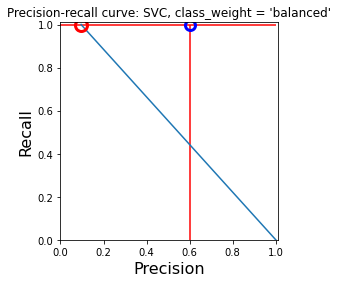

At zero threshold, precision: 0.10, recall: 1.00
Difference (precision - recall): -0.90


In [19]:
clf = SVC(kernel='rbf', C=10, gamma = 1).fit(X_train, y_train)
y_scores = clf.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.plot(0.6, closest_zero_r, 'o', markersize=10, fillstyle='none', c='b', mew=3)
plt.hlines(closest_zero_r, 0, 1, colors='r', linestyles='solid')
plt.vlines(0.6, 0, 1, colors='r', linestyles='solid')
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'.format(closest_zero_p, closest_zero_r))
print('Difference (precision - recall): {:.2f}'.format(closest_zero_p - closest_zero_r))